In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64) # квалификация репетитора

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # подходит или нет репетитор

In [3]:
def calc_std_feat(x):  # стандартизация
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])
X_st[2, :]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

$$Logloss=-y \ln(p) - (1-y)\ln(1-p)$$

In [5]:
def calc_logloss(y, y_pred):  # функция, которую требуется минимизировать
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

def eval_LR_model(X, y, iterations, alpha=1e-4):  # логистическая регрессия
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(w, X) # значения функции линейной регрессии
        y_pred = sigmoid(z) # находим предсказанные вероятности
        err = calc_logloss(y, y_pred) # считаем ошибку
        w -= alpha * (1/n * np.dot((y_pred - y), X.T)) # корректируем веса
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [6]:
w = eval_LR_model(X_st, y, iterations=1000, alpha=1e-2)

100 [ 0.25769171 -0.68297243  0.68841418  1.2405903 ] 0.5908596023453088
200 [ 0.14805533 -0.69317972  0.77965488  1.21287192] 0.5687278067099053
300 [ 0.06257746 -0.68605867  0.85181735  1.21283095] 0.5560473747533587
400 [-0.00887935 -0.68415387  0.90713736  1.22443854] 0.5476800278385013
500 [-0.0701621  -0.68661758  0.94984062  1.24404686] 0.541676599615156
600 [-0.1239972  -0.69202069  0.98318257  1.26924759] 0.5369841864977791
700 [-0.17239277 -0.69933957  1.00953865  1.29824779] 0.5330427663756572
800 [-0.21681092 -0.7078635   1.03062761  1.32973537] 0.5295551503580799
900 [-0.25830834 -0.71709934  1.04769231  1.36276535] 0.5263621224044183
1000 [-0.29764618 -0.72670545  1.061634    1.39666497] 0.5233765331724747


# 1.
Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - np.clip).  

In [7]:
def calc_logloss_notnull(y, y_pred):  # функция, которую требуется минимизировать
    err = np.mean(- y * np.log(np.clip(y_pred, a_min=0.00001, a_max=1)) - \
                  (1.0 - y) * np.log(np.clip(1.0 - y_pred, a_min=0.00001, a_max=1)))
    return err

# 2. 
Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [8]:
w = eval_LR_model(X_st, y, iterations=10000, alpha=2.5)

1000 [-21.17001579  -2.35444098  -5.36349928  17.50302905] 0.17676283829556166
2000 [-28.03095459  -2.90190816  -7.38003474  23.06547415] 0.14271158919878277
3000 [-33.07846286  -3.34734572  -8.83735615  27.14094584] 0.12484276343943798
4000 [-37.12004416  -3.7012811   -9.99857511  30.39112083] 0.11345529139446227
5000 [-40.52898407  -3.99610252 -10.97704518  33.12073157] 0.10539154829052189
6000 [-43.50613611  -4.24960791 -11.83259501  35.49390573] 0.09926601768210754
7000 [-46.17111014  -4.47256654 -12.60035001  37.60849152] 0.0943759153602304
8000 [-48.60052773  -4.67198084 -13.30254877  39.527271  ] 0.09032620999697485
9000 [-50.84622789  -4.85266678 -13.95407721  41.29282126] 0.08687725011969354
10000 [-52.94479138  -5.01809009 -14.56533015  42.9352888 ] 0.08387484986093062


# 3. 
Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred_proba).

In [9]:
def calc_pred_proba(w=w, X=X_st):
    z = np.dot(w, X) # значения функции линейной регрессии
    y_pred_proba = sigmoid(z) # находим предсказанные вероятности
    return list(y_pred_proba)

In [10]:
calc_pred_proba(w)

[0.3187449644411914,
 0.0011496536114039984,
 0.999999999999867,
 0.022679685162571628,
 0.9734926625241044,
 0.00855325265830707,
 0.9999999999999993,
 0.00600720758715845,
 0.6775104555479238,
 0.9999999997571691]

# 4.
Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred).

In [11]:
def calc_pred(w=w, X=X_st):
    z = np.dot(w, X) # значения функции линейной регрессии
    y_pred_proba = sigmoid(z) # находим предсказанные вероятности
    y_pred = [1 if y >= 0.5 else 0 for y in y_pred_proba] # переводим в 0 и 1
    return np.array(y_pred)

In [12]:
y_pred = calc_pred(w, X_st)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

# 5.
Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.

**доля правильных ответов (accuracy)**

In [13]:
def score_accuracy(y_pred=y_pred, y=y):
    """
    Считает долю верных ответов
    """
    acc = np.sum((y_pred == y)+0) / len(y)
    return str(round(acc*100, 1)) + '%'

In [14]:
score_accuracy(y_pred, y)

'100.0%'

***
**матрица ошибок**

In [15]:
def score_confusion_matrix(y_pred=y_pred, y=y, n_try=1):
    """
    Построение матрицы ошибок
    arguments:
        n_try -- номер модели
    return tuple:
        matrix  -- матрица ошибок
        matrix_ -- матрица долей ошибок
    """
    #possibilities = np.unique(y)
    matrix = pd.DataFrame(np.zeros([2, 2]), 
                      index=[f'a{n_try}(x)=+1', f'a{n_try}(x)=-1'], 
                      columns=['y=+1', 'y=-1'])
    matrix.iloc[0,0] = np.sum(y_pred[y == 1] == y[y == 1]) # правильные 1
    matrix.iloc[1,1] = np.sum(y_pred[y == 0] == y[y == 0]) # правильные 0
    matrix.iloc[0,1] = len(y[y == 1]) - matrix.iloc[0,0]   # неправильные 1
    matrix.iloc[1,0] = len(y[y == 0]) - matrix.iloc[1,1]   # неправильные 0
    
    matrix_ = matrix.copy()
    matrix_ = matrix_.div(matrix_.sum(axis=1), axis=0)
    return matrix, matrix_

In [16]:
errors_matrix = score_confusion_matrix(y_pred, y)
errors_matrix[0]

,y=+1,y=-1
a1(x)=+1,5.0,0.0
a1(x)=-1,0.0,5.0


In [17]:
errors_matrix[1]

,y=+1,y=-1
a1(x)=+1,1.0,0.0
a1(x)=-1,0.0,1.0


***
**точность (precison)**

In [18]:
def score_precision(matrix=errors_matrix[0]):
    """
    Точность (precision) представляет из себя долю 
    истинных срабатываний от общего количества срабатываний. 
    Она показывает, насколько можно доверять алгоритму классификации.
    """
    TP = matrix.iloc[0, 0] + matrix.iloc[1, 1]
    TP_FP = matrix.sum(axis=1).sum(axis=0)
    precision = TP / TP_FP
    return str(round(precision*100, 1)) + '%'

In [19]:
precision = score_precision(errors_matrix[0])
precision

'100.0%'

***
**полнота (recall)**

In [20]:
def score_recall(matrix=errors_matrix[0]):
    """
    Полнота (recall) считается как доля объектов, 
    истинно относящихся к классу "+1", 
    которые алгоритм отнес к этому классу.
    """
    TP = matrix.iloc[0, 0]
    TP_FP = matrix.iloc[:, 0].sum(axis=0)
    recall = TP / TP_FP
    return str(round(recall*100, 1)) + '%'

In [21]:
recall = score_recall(errors_matrix[0])
recall

'100.0%'

***
**F1-score**

In [22]:
def score_f1(precision=precision, recall=recall):
    """
    F-мера представляет собой среднее гармоническое между точностью и полнотой.
    В отличие от среднего арифметического, 
    если хотя бы один из аргументов близок к нулю, 
    то и среднее гармоническое будет близко к нулю. 
    По сути, F-мера является сглаженной версией минимума из точности и полноты.
    """
    precision = float(precision.replace('%', ''))/100
    recall = float(recall.replace('%', ''))/100
    f1 = 2*precision*recall / (precision + recall)
    return str(round(f1*100, 1)) + '%'

In [23]:
f1 = score_f1(precision, recall)
f1

'100.0%'

# 6.
Могла ли модель переобучиться? Почему?

*> Модель могла переобучиться, так как мало наблюдений.*

# 7.
Создайте функции eval_LR_model_l1 и eval_LR_model_l2 с применением L1 и L2 регуляризации соответственно.

In [24]:
def eval_LR_model_L1(X, y, iterations, alpha=1e-4, lambda_=1e-8):  # логистическая регрессия
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(w, X) # значения функции линейной регрессии
        y_pred = sigmoid(z) # находим предсказанные вероятности
#         err = calc_logloss(y, y_pred) # считаем ошибку
        err = np.mean(- y * np.log(np.clip(y_pred, a_min=0.00001, a_max=1)) - \
                  (1.0 - y) * np.log(np.clip(1.0 - y_pred, a_min=0.00001, a_max=1)))
        w -= alpha*(2/n*np.dot((y_pred - y), X.T) + lambda_*np.sign(w)) # корректируем веса
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

def eval_LR_model_L2(X, y, iterations, alpha=1e-4, lambda_=1e-8):  # логистическая регрессия
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(w, X) # значения функции линейной регрессии
        y_pred = sigmoid(z) # находим предсказанные вероятности
#         err = calc_logloss(y, y_pred) # считаем ошибку
        err = np.mean(- y * np.log(np.clip(y_pred, a_min=0.00001, a_max=1)) - \
                  (1.0 - y) * np.log(np.clip(1.0 - y_pred, a_min=0.00001, a_max=1)))
        w -= alpha*(2/n * np.dot((y_pred - y), X.T) + 2*lambda_*w)  # корректируем веса
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [25]:
w_L1 = eval_LR_model_L1(X_st, y, iterations=4000, alpha=2.5)

400 [-31.21444547  -3.19698968  -8.28725777  25.6565028 ] 0.1309072801315373
800 [-35.62942958  -3.57120776  -9.57058972  29.19402683] 0.11741021473253628
1200 [-38.57626308  -3.82773078 -10.41652316  31.55861249] 0.10986643557282824
1600 [-41.18169424  -4.05203566 -11.16448221  33.64193819] 0.10398845361868414
2000 [-43.53117429  -4.25172135 -11.83979816  35.51381771] 0.0992230529517385
2400 [-45.68213976  -4.43197087 -12.45930477  37.22124599] 0.09524037335767001
2800 [-47.67493894  -4.59646833 -13.03471904  38.79727891] 0.09183128576618511
3200 [-49.53892705  -4.74792836 -13.57449311  40.26600895] 0.08885658209030885
3600 [-51.29607793  -4.8884127  -14.0849014   41.64551351] 0.08621985950104098
4000 [-52.96323055  -5.01952842 -14.57071176  42.94968824] 0.08385214180192334


In [26]:
w_L2 = eval_LR_model_L2(X_st, y, iterations=4000, alpha=2.5)

400 [-31.3695428   -3.2117303   -8.32751819  25.7927376 ] 0.1303673775871209
800 [-36.18358545  -3.61978852  -9.72955965  29.63959209] 0.11591047037976192
1200 [-39.06106977  -3.86966799 -10.55566599  31.94682238] 0.10872060137157713
1600 [-41.61503551  -4.08906489 -11.28895868  33.98769673] 0.10307388450289356
2000 [-43.92490902  -4.28490964 -11.95309611  35.82682802] 0.09846849144756589
2400 [-46.04446339  -4.46206494 -12.56381106  37.50822281] 0.09460156637415613
2800 [-48.01173245  -4.62401126 -13.1321311   39.06304969] 0.09127926741684207
3200 [-49.85454062  -4.773328   -13.66605561  40.51415348] 0.08837157128370408
3600 [-51.59381029  -4.91198392 -14.17154986  41.87875517] 0.08578786840244504
4000 [-53.24563514  -5.04152004 -14.65316367  43.17014362] 0.0834629872845245


***
L1 изменение lambda

In [27]:
lambda_w_l1 = {}
lambdas = [0.00001, 0.0005, 0.001, 0.005, 0.01, 0.2, 1, 3, 5, 10]
for lam in lambdas:
    lambda_w_l1[lam]= eval_LR_model_L1(X_st, y, iterations=4000, alpha=2.5, lambda_=lam)
    print()

400 [-31.19281296  -3.19326142  -8.28076529  25.64187719] 0.1309760053639915
800 [-35.65119951  -3.62776092  -9.55723183  29.20576846] 0.11774435883606268
1200 [-38.58258056  -3.82821895 -10.41832235  31.56359519] 0.10985136581429715
1600 [-41.17545974  -4.05142878 -11.16268177  33.63686485] 0.10400177563397514
2000 [-43.51351805  -4.25014151 -11.83471385  35.49965728] 0.09925722659542674
2400 [-45.6537977   -4.42950628 -12.45113344  37.19864608] 0.09529078522136265
2800 [-47.63640195  -4.59318592 -13.02358456  38.76668705] 0.0918949605845036
3200 [-49.49052735  -4.74388088 -13.56047285  40.2277423 ] 0.08893151767823246
3600 [-51.23804178  -4.88364302 -14.06804229  41.59980127] 0.0863046599104601
4000 [-52.89571186  -5.0140721  -14.55104057  42.89669842] 0.08394580358083656

400 [-30.91285425  -3.26561208  -8.19688863  25.33590135] 0.13313473539412723
800 [-35.56257451  -3.56309539  -9.55053783  29.13729018] 0.11759433203691332
1200 [-37.93052883  -3.76897403 -10.2304629   31.03750515]

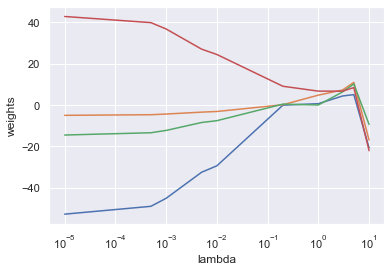

In [28]:
x_plot = list(lambda_w_l1.keys())
y_plot = list(lambda_w_l1.values())
plt.plot(x_plot, y_plot)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.show()

***
L1 изменение lambda

In [29]:
lambda_w_l2 = {}
lambdas = [0.00001, 0.0005, 0.001, 0.005, 0.01, 0.2, 1, 3, 5, 10]
for lam in lambdas:
    lambda_w_l2[lam]= eval_LR_model_L2(X_st, y, iterations=4000, alpha=2.5, lambda_=lam)
    print()

400 [-31.11337635  -3.23549005  -8.20042515  25.67368865] 0.13122776859640553
800 [-35.21845542  -3.62043353  -9.42294163  28.86192491] 0.11932428442097079
1200 [-37.53904937  -3.73717547 -10.11946216  30.72618638] 0.11240081102219453
1600 [-39.52615202  -3.90914085 -10.68988724  32.31770528] 0.10764122484248868
2000 [-41.26106213  -4.0580154  -11.18813209  33.7037261 ] 0.10381659219467994
2400 [-42.79503657  -4.18849821 -11.62906781  34.92623104] 0.10066367244883978
2800 [-44.16501505  -4.30400321 -12.02333292  36.01548522] 0.09801157342688663
3200 [-45.39850903  -4.4070887  -12.37880407  36.9940317 ] 0.09574427466347588
3600 [-46.51657268  -4.49972143 -12.70148077  37.87912093] 0.09378005769218362
4000 [-47.53569041  -4.58344608 -12.9960429   38.68425542] 0.09205956792950656

400 [-24.74283582  -3.79880882  -4.55700627  22.85014678] 0.2238371131192952
800 [-24.92524502  -6.9725227   -6.80676046  18.79767308] 0.40081745049976697
1200 [-24.81171578  -4.06851474  -4.11275679  23.4752237

<ipython-input-5-4e4ea7c03c19>:6: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))
<ipython-input-24-8ee5392e6225>:26: RuntimeWarning: overflow encountered in multiply
  w -= alpha*(2/n * np.dot((y_pred - y), X.T) + 2*lambda_*w)  # корректируем веса


3200 [nan nan nan nan] nan
3600 [nan nan nan nan] nan
4000 [nan nan nan nan] nan

400 [nan nan nan nan] nan
800 [nan nan nan nan] nan
1200 [nan nan nan nan] nan
1600 [nan nan nan nan] nan
2000 [nan nan nan nan] nan
2400 [nan nan nan nan] nan
2800 [nan nan nan nan] nan
3200 [nan nan nan nan] nan


<ipython-input-24-8ee5392e6225>:26: RuntimeWarning: invalid value encountered in subtract
  w -= alpha*(2/n * np.dot((y_pred - y), X.T) + 2*lambda_*w)  # корректируем веса


3600 [nan nan nan nan] nan
4000 [nan nan nan nan] nan

400 [nan nan nan nan] nan
800 [nan nan nan nan] nan
1200 [nan nan nan nan] nan
1600 [nan nan nan nan] nan
2000 [nan nan nan nan] nan
2400 [nan nan nan nan] nan
2800 [nan nan nan nan] nan
3200 [nan nan nan nan] nan
3600 [nan nan nan nan] nan
4000 [nan nan nan nan] nan

400 [nan nan nan nan] nan
800 [nan nan nan nan] nan
1200 [nan nan nan nan] nan
1600 [nan nan nan nan] nan
2000 [nan nan nan nan] nan
2400 [nan nan nan nan] nan
2800 [nan nan nan nan] nan
3200 [nan nan nan nan] nan
3600 [nan nan nan nan] nan
4000 [nan nan nan nan] nan



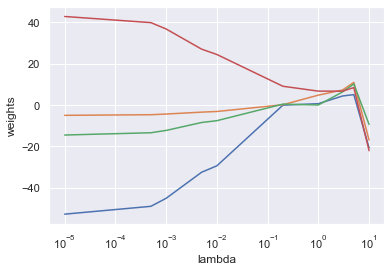

In [30]:
x_plot = list(lambda_w_l1.keys())
y_plot = list(lambda_w_l1.values())
plt.plot(x_plot, y_plot)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.show()